# Analysis of Different Variables

- Chiemi Tagami (CC'24)

## Overview

This Jupyter Notebook analyzes the data from Antarctic Ice Sheet simulation model. The codes are adapted from 

https://github.com/ldeo-glaciology/pangeo-glaciology-examples/blob/master/04_paleo_PISM.ipynb

and the dataset is obtained from

Albrecht, Torsten (2019): PISM parameter ensemble analysis of Antarctic Ice Sheet glacial cycle simulations. PANGAEA, https://doi.pangaea.de/10.1594/PANGAEA.909728

### Definition of the ensemble parameters:
- par_esia: the non-sliding shallow-ice approximation (SIA) enhancement factor
- par_ppq: exponent "q" used in pseudo-plastic sliding law
- par_prec: precipitation scaling factor according to temperature forcing
- par_visc: mantle visocsity

### Definition of the terminologies:
- SIA: Assumes that the ice base is strongly connected to the bedrock and shear stress drives the ice flow in planes parallel to the geoid. Can be applied to the majority of Antarctic ice sheets, where the base of the grounded ice is frozen to the bedrock.

In [3]:
# load a package called intake, which is used to load the data. 
import intake

In [4]:
# load the intake catalog
cat = intake.open_catalog('https://raw.githubusercontent.com/ldeo-glaciology/pangeo-pismpaleo/main/paleopism.yaml')

# load each of the zarr diretories contained in the intake catalog
present  = cat["present"].to_dask()
mask_score_time_series  = cat["mask_score_time_series"].to_dask()

## Investigation of Ensemble Member Combinations
In my previous analysis, I focused on the influence of viscosity and precipitation on ice sheet thickness anomaly.
https://github.com/ct3012/Antarctic-Ice-Sheet-Model/blob/main/Ice%20Sheet%20Model.ipynb

This time, I will begin with examining the influence of the SIA enhancement factor and q on ice sheet thickness anomaly.

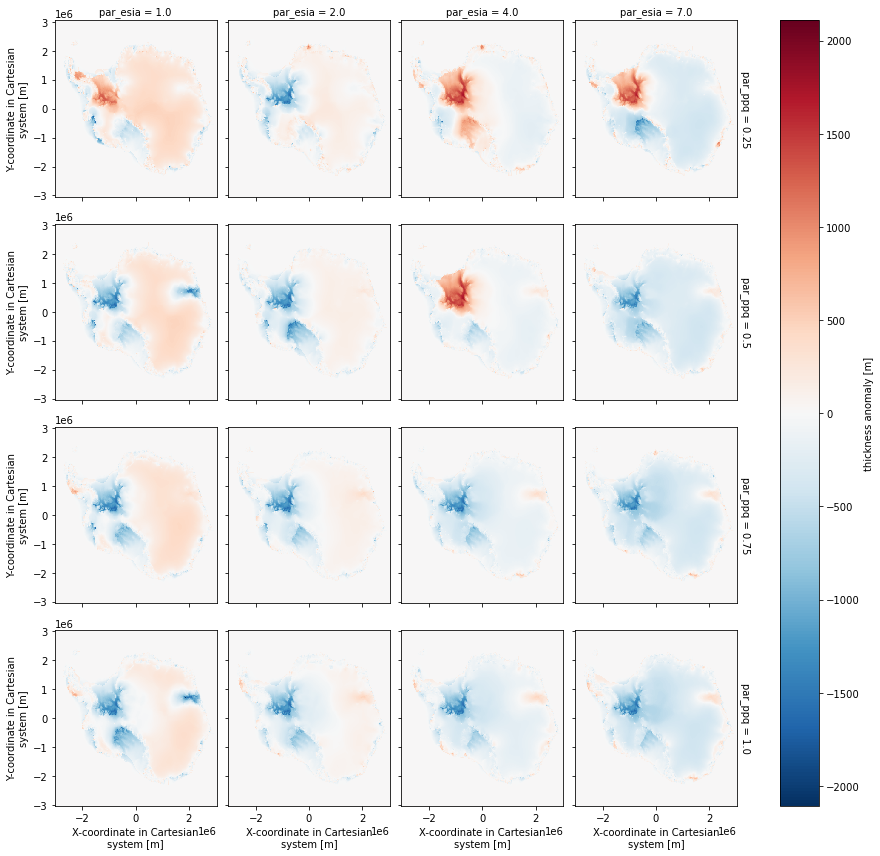

In [4]:
# ice thickness anomaly shown as an array of plots, with precipitation and viscosity fixed at median values(par_prec= 0.07, par_visc = 2.5e+21)
mean_thk = present.thk.mean({'par_esia','par_visc','par_ppq','par_prec'},keep_attrs=True)
thickness_anomaly = (present.thk.isel(par_visc=2,par_prec=2)-mean_thk)
thickness_anomaly.attrs['long_name'] = 'thickness anomaly'
thickness_anomaly.attrs['units'] = 'm'
thickness_anomaly.plot(x='x',y='y',col='par_esia',row='par_ppq');

For every plot with q greater than 0.75, a large negative thickness anomaly was created at the Ronne Ice Shelf. The combination (par_esia= 4.0, par_ppq = 0.25, par_prec= 0.07, par_visc = 2.5e+21) yielded the largest positive thickness anomaly for both the Rone and Ross Ice Shelves.
Another interesting point was that the thickness anomaly was larger with the visocsity and precipitation fixed at the median values than the SIA enhancement factor and q fixed at the median values. This suggests the possibility the WAIS ice shelf thickness is more sensitive to SIA enhancement factor and q. I will investigate this hypothesis below.

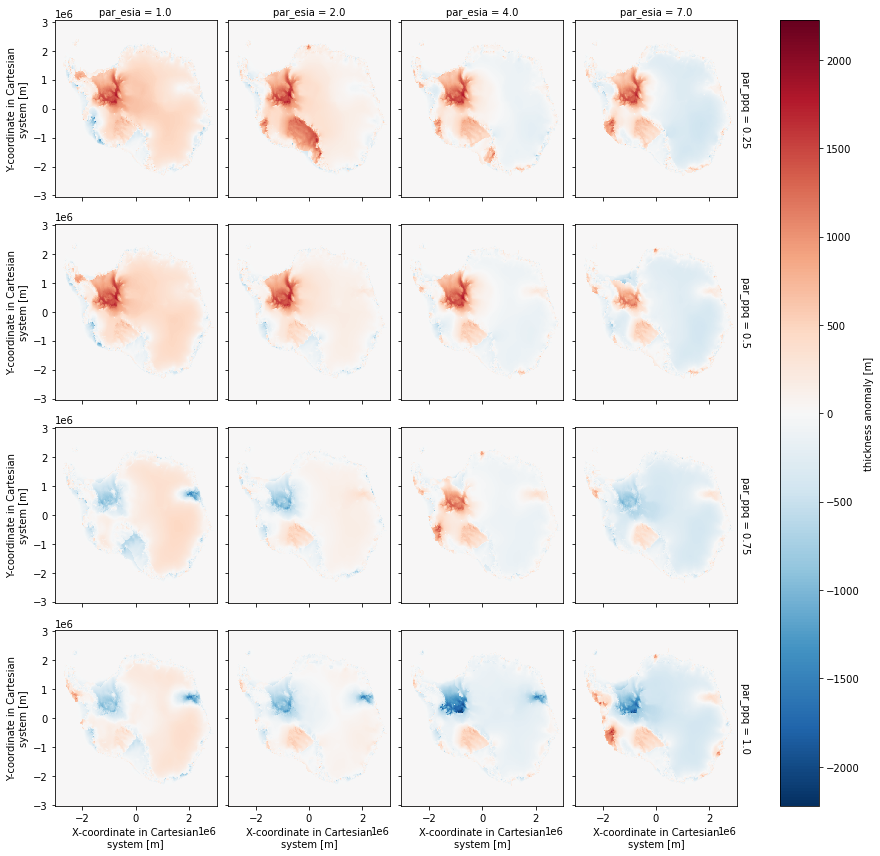

In [6]:
# ice thickness anomaly shown as an array of plots, with precipitation and viscosity fixed at median values(par_prec= 0.05, par_visc = 5e+20)
mean_thk = present.thk.mean({'par_esia','par_visc','par_ppq','par_prec'},keep_attrs=True)
thickness_anomaly = (present.thk.isel(par_visc=1,par_prec=1)-mean_thk)
thickness_anomaly.attrs['long_name'] = 'thickness anomaly'
thickness_anomaly.attrs['units'] = 'm'
thickness_anomaly.plot(x='x',y='y',col='par_esia',row='par_ppq');

This time, the thickness anomaly was even greater than with par_prec= 0.07,par_visc = 2.5e+21. The combination (par_esia= 2.0, par_ppq = 0.25, par_prec= 0.07, par_visc = 2.5e+21) yielded the largest positive thickness anomaly for both the Rone and Ross Ice Shelves. With this combination, a positive anomaly is observed in the entire Antarctic ice sheet. Most importantly, the large positive anomalies are observed in the inner part of the ice shelves, and some small negative anomalies are seen at the periphery. This situation is ideal for increase in ice volume because the ice sheet is very stabilized.

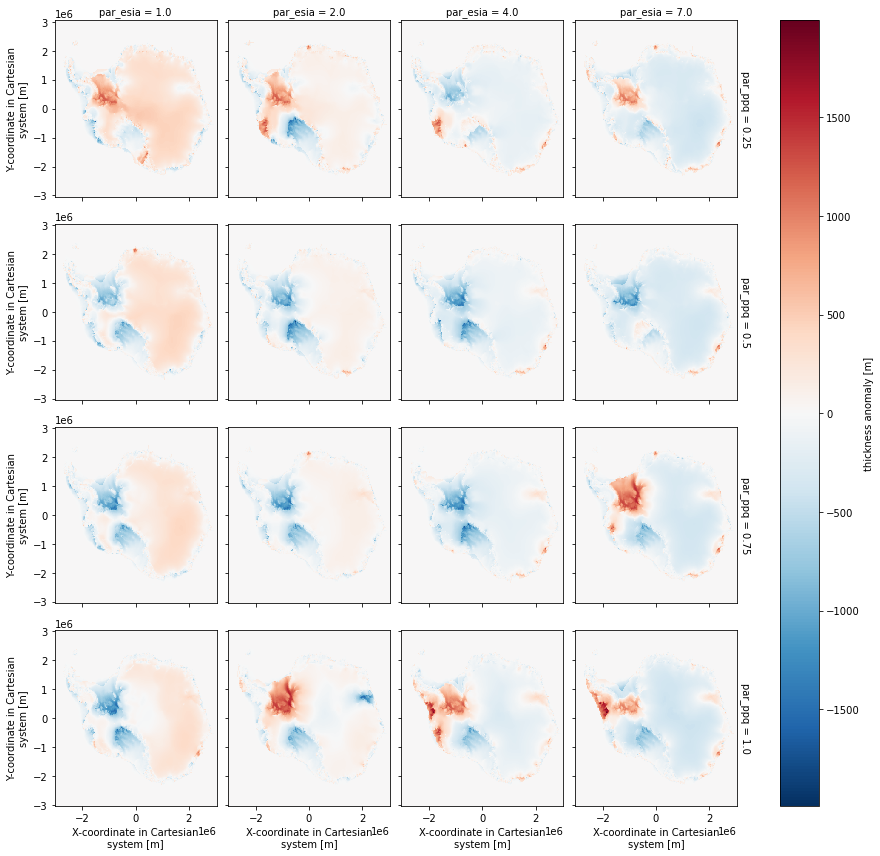

In [14]:
# ice thickness anomaly shown as an array of plots, with precipitation and viscosity fixed at maximum values(par_prec= 0.1, par_visc = 1e+22)
mean_thk = present.thk.mean({'par_esia','par_visc','par_ppq','par_prec'},keep_attrs=True)
thickness_anomaly = (present.thk.isel(par_visc=3,par_prec=3)-mean_thk)
thickness_anomaly.attrs['long_name'] = 'thickness anomaly'
thickness_anomaly.attrs['units'] = 'm'
thickness_anomaly.plot(x='x',y='y',col='par_esia',row='par_ppq');

This time, the thickness anomaly became smaller.

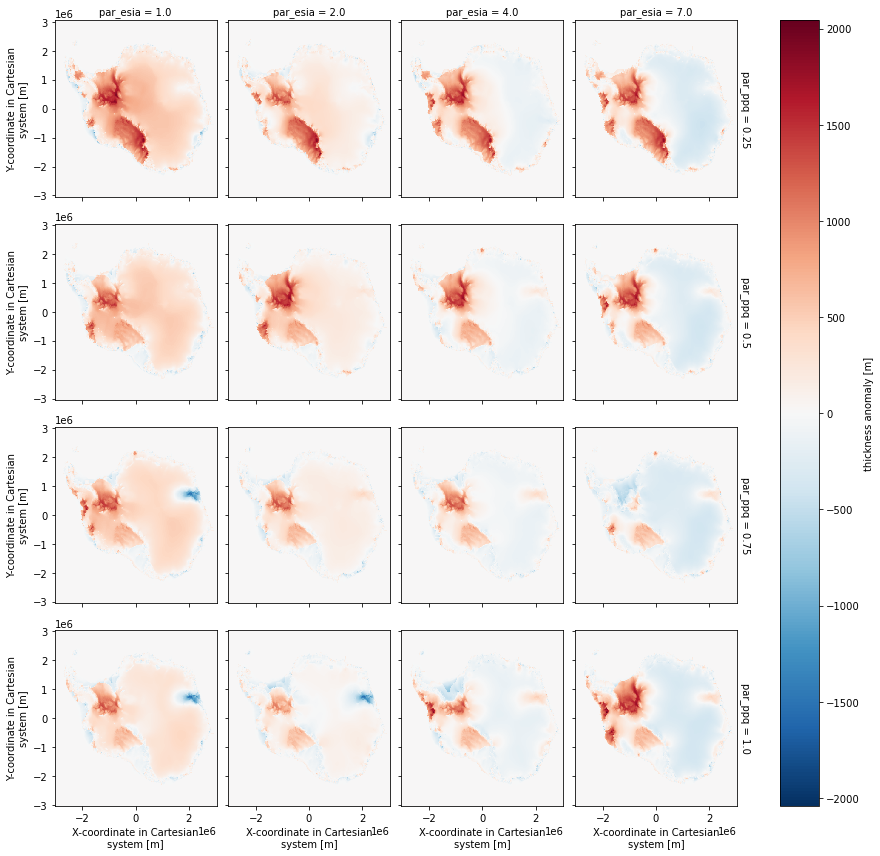

In [18]:
# ice thickness anomaly shown as an array of plots, with precipitation and viscosity fixed at minimum values(par_prec= 0.02, par_visc = 1e+20)
mean_thk = present.thk.mean({'par_esia','par_visc','par_ppq','par_prec'},keep_attrs=True)
thickness_anomaly = (present.thk.isel(par_visc=0,par_prec=0)-mean_thk)
thickness_anomaly.attrs['long_name'] = 'thickness anomaly'
thickness_anomaly.attrs['units'] = 'm'
thickness_anomaly.plot(x='x',y='y',col='par_esia',row='par_ppq');

Thickness anomaly for this combination was smaller than that for the two median value combinations. However, the combination par_prec= 0.02,par_visc = 1e+20 was very interesting in that for all of the SIA enhancement factor and q combinations, there was a positive anomaly for either the Ronne Ice Shelf or the Ross Ice Shelf, or even both.

Now that I have a rough understanding of the influence of SIA enhancement factor and q on ice thickness anomaly, I plotted out thickness anomaly plots for all possible ensemble combinatioins in:

(link)

For the provided 256 sets of combinations, the combination (par_esia= 7.0, par_ppq = 0.75, par_prec= 0.1, par_visc = 1e+20) probably yielded the largst overall negative anomaly. There is uncertainty because this assessment is based on observation of the darkness of the colors and the range of the colorscale. Under this combination, the Antarctic ice sheet was in a very unstable condition because there were large negative anomaly towards the center and some positive anomalies at the periphery. It was interesting that apart from par_ppq = 0.75, all the other variables were at the extreme values (par_esia= max, par_ppq = second max, par_prec= max, par_visc = min).

The combination (par_esia= 1.0, par_ppq = 0.25, par_prec= 0.02, par_visc = 1e+20) probably yielded the largst overall positive anomaly. Under this combination, the Antarctic ice sheet was in a stable condition because the positive anomaly increased inwards and some negative anomalies were observed at the periphery. It was particularly interesting that all the variables were at their minimum values in this combination.

Comparing the two combinations that yield the largest negative and positive ice thickness anomalies, it is inferred that with the exception of viscosity, smaller values result in ice gain, while larger values result in ice loss. In addition, since the viscosity is at the lowest value for both combinations, it is possible that viscosity controlls the ice's sensitivity to the change in other variables, rather than itself acting towards positive or negative anomaly.

In order to test this hypothesis, I looked for the combination with the smallest ice thickness anomaly, and predicted that the viscosity will be the at highest value and the other variables will have the median values. The combination with roughly the smallest anomaly was (par_esia= 4.0, par_ppq = 0.75, par_prec= 0.02, par_visc = 2.5e+21). Both the SIA enhancement factor and q were at the median values, which fitted my prediction. However, the precipitation was at the minimum and the viscosity was the second highest, which were not expected from my hypothesis. Further investigation is required for inferring the influence of each variable, as well as the interaction between them. 

Lastly, I will visualize the characteristic and behavior of the Antarctic ice sheet under the three combinations selected above.

## Transition of Ice Type with Time

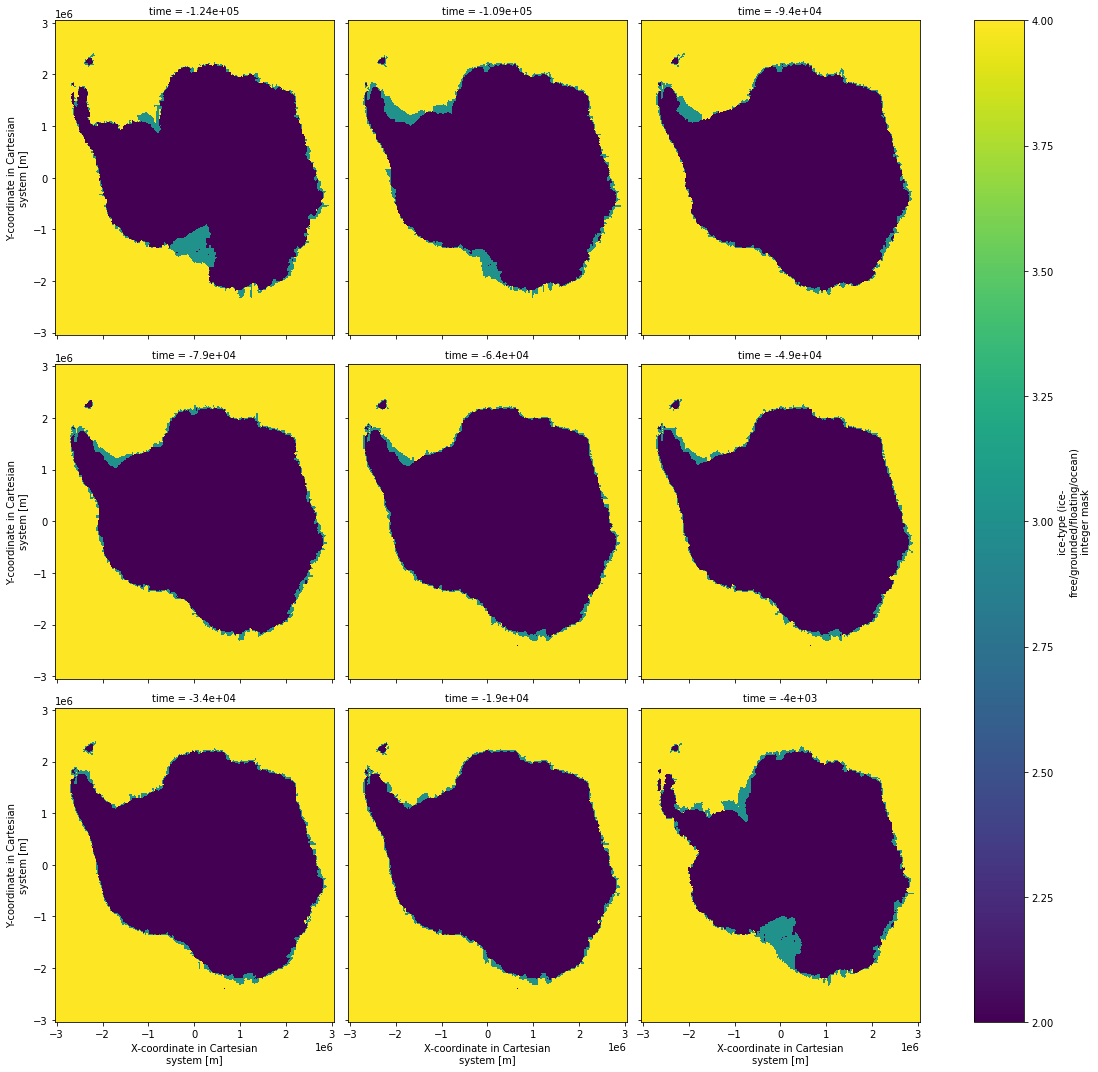

In [6]:
# The transition of ice type with time for the combination with the largest negative ice thickness anomaly:
# (par_esia= 7.0, par_ppq = 0.75, par_prec= 0.1, par_visc = 1e+20).
mask_score_time_series.mask.isel(par_esia=3, par_ppq=2, par_prec=3, par_visc=0,
                       time=slice(0,124,15)).plot(x='x',y='y',col='time',col_wrap=3,size = 5)

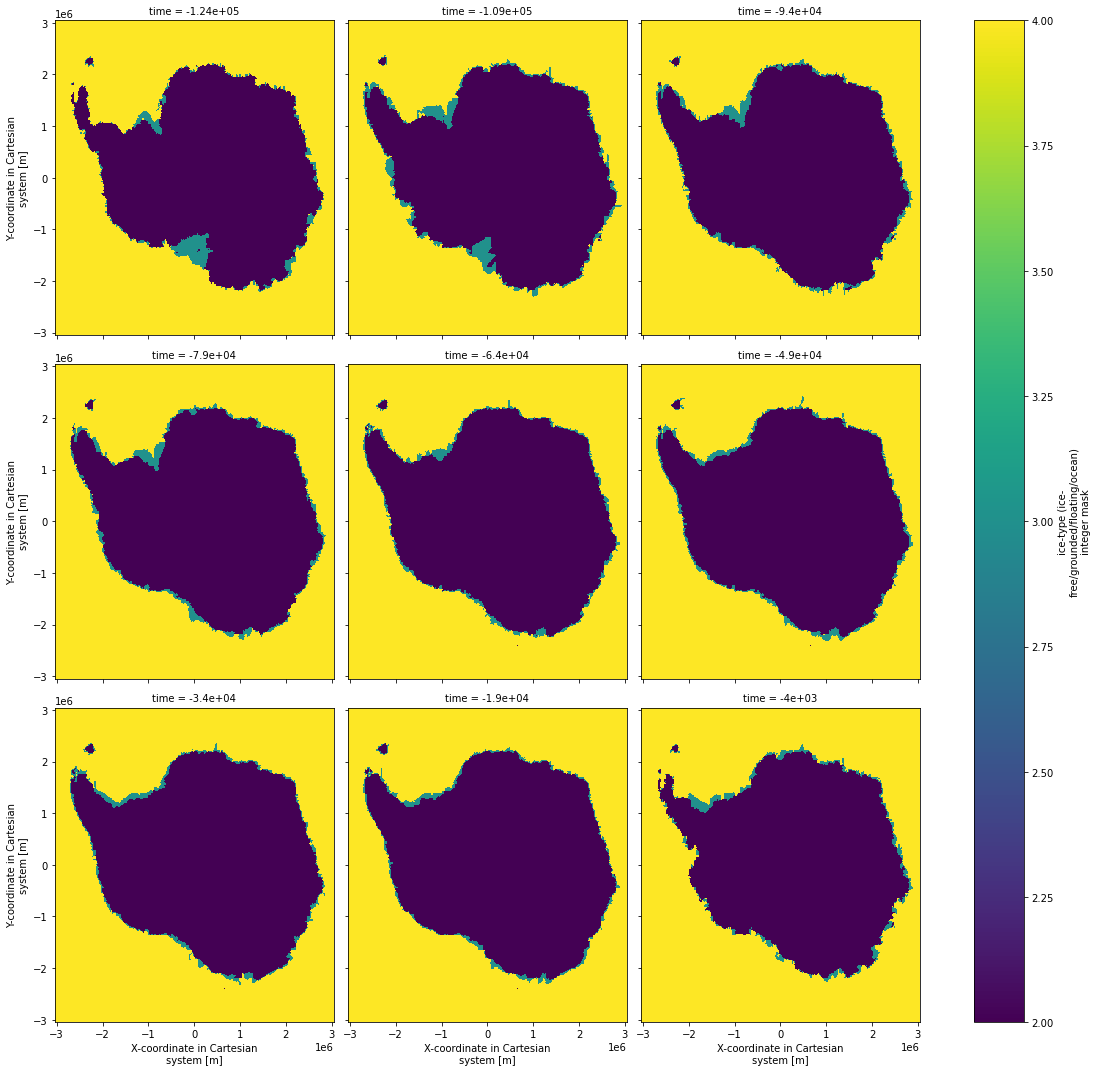

In [11]:
# The transition of ice type with time for the combination with the largest positive ice thickness anomaly:
# (par_esia= 1.0, par_ppq = 0.25, par_prec= 0.02, par_visc = 1e+20).
mask_score_time_series.mask.isel(par_esia=0, par_ppq=0, par_prec=0, par_visc=0,
                       time=slice(0,124,15)).plot(x='x',y='y',col='time',col_wrap=3,size = 5)

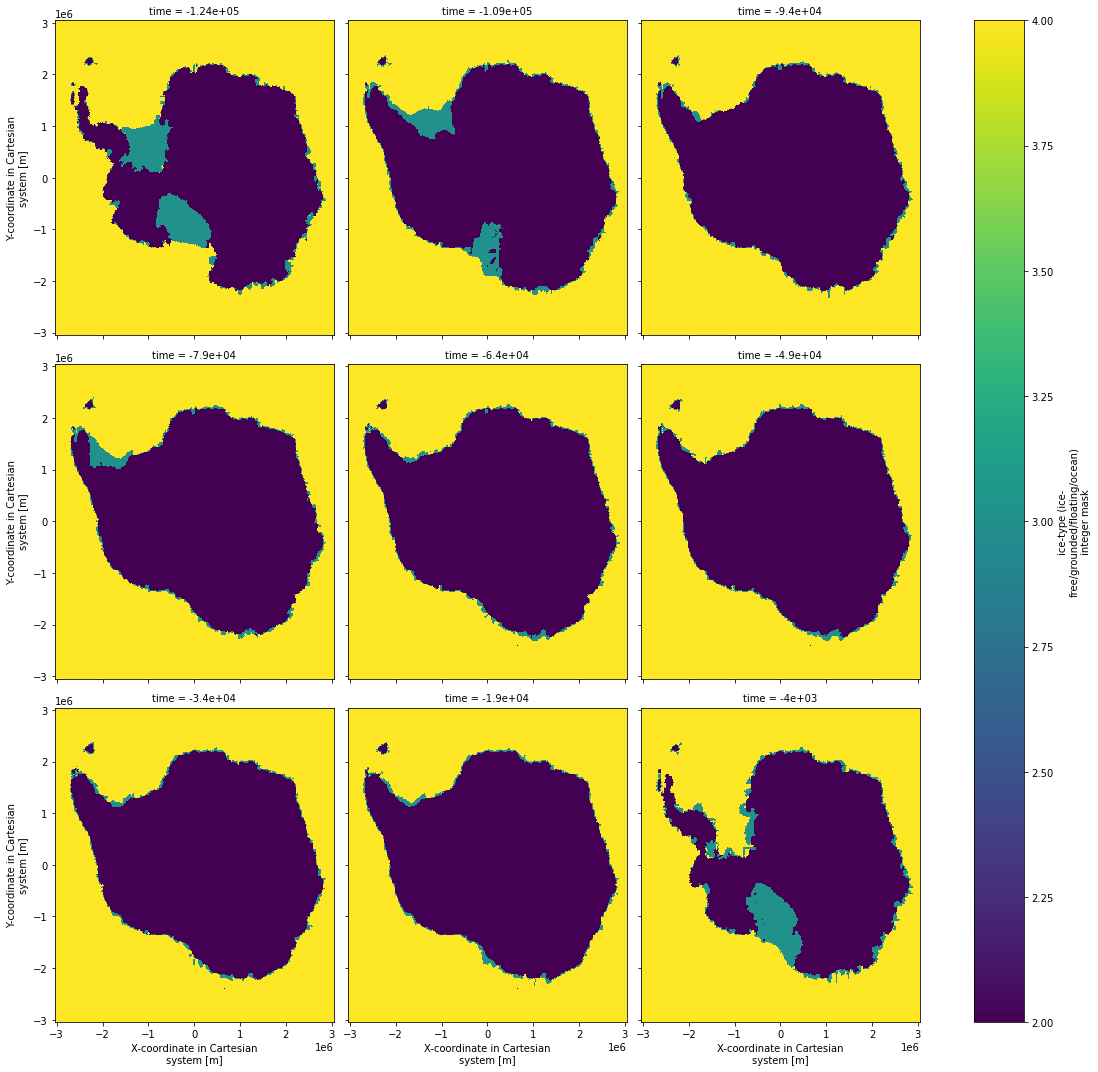

In [15]:
# The transition of ice type with time for the combination with the smallest ice thickness anomaly:
# (par_esia= 4.0, par_ppq = 0.75, par_prec= 0.02, par_visc = 2.5e+21).
mask_score_time_series.mask.isel(par_esia=2, par_ppq=2, par_prec=0, par_visc=2,
                       time=slice(0,124,15)).plot(x='x',y='y',col='time',col_wrap=3,size = 5)

I expected to have the largest grounded ice area for the combination with the largest positive ice thickness anomaly (hereinafter referred to as max. pos.) and the smallest grounded ice area for the combination with the largest negative ice thickness anomaly (hereinafter referred to as max. neg.).

The Antarctic ice sheet gained and lost grounded ice and ice shelves from different positions for different combinations. Ice advance and retreat occured roughly in the same manner for the combinations with the largest anomalies. A distintion between the two combinations was that  for the combination max. pos., less ice shelves were formed at the Weddel Sea and the ice remained grounded at the Ross Sea at the end of the time series (time = -4e+03). Contraty to my prediction, ice loss was the most prominent in the smallest ice thickness anomaly combination (hereinafter referred to as min. anom.). The Ronne Ice Shelf was especially susceptible to climate change, and a large area of the grounded ice in time = -1.9e+04 are completely lost in time = -4e+03. The area of the Ross Ice Shelf in time = -4e+03 was also the largest for this combination.

## Land Ice Thickness

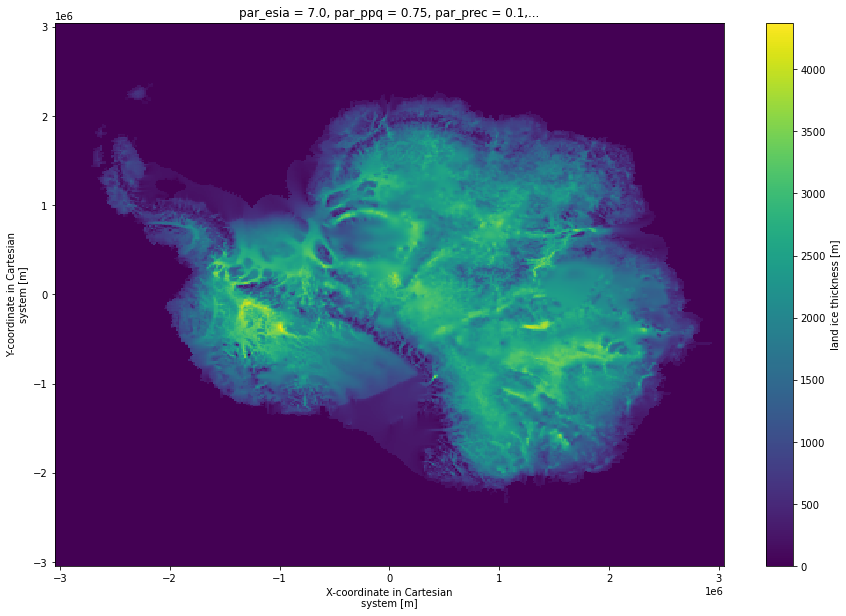

In [5]:
# Land ice thickness plotted for the comnbination with the largest negative ice thickness anomaly:
# (par_esia= 7.0,par_ppq = 0.75, par_prec= 0.1,par_visc = 1e+20)
present.thk.isel(par_esia=3,par_ppq = 2, par_prec= 3,par_visc = 0).plot(size = 10)

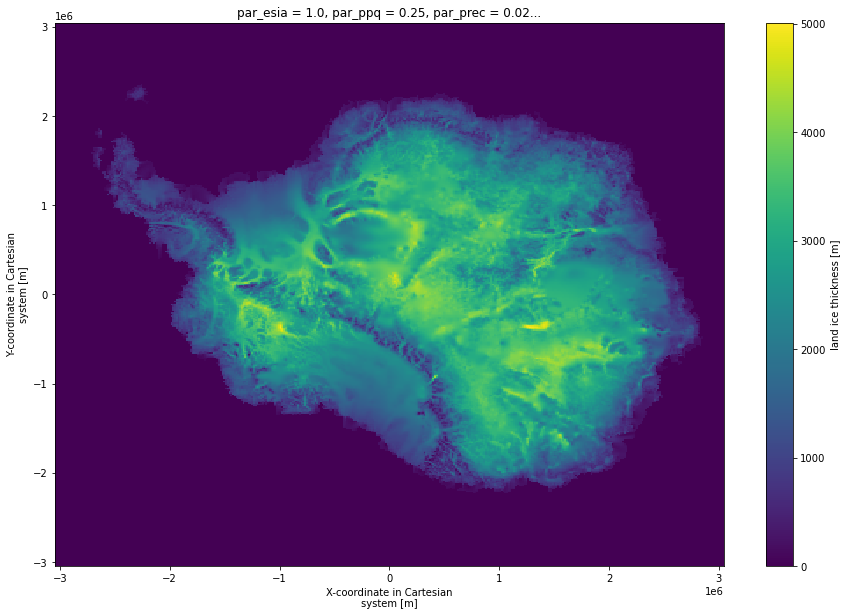

In [9]:
# Land ice thickness plotted for the comnbination with the largest positive ice thickness anomally:
# (par_esia= 1.0, par_ppq = 0.25, par_prec= 0.02, par_visc = 1e+20)
present.thk.isel(par_esia=0,par_ppq = 0, par_prec= 0,par_visc = 0).plot(size = 10)

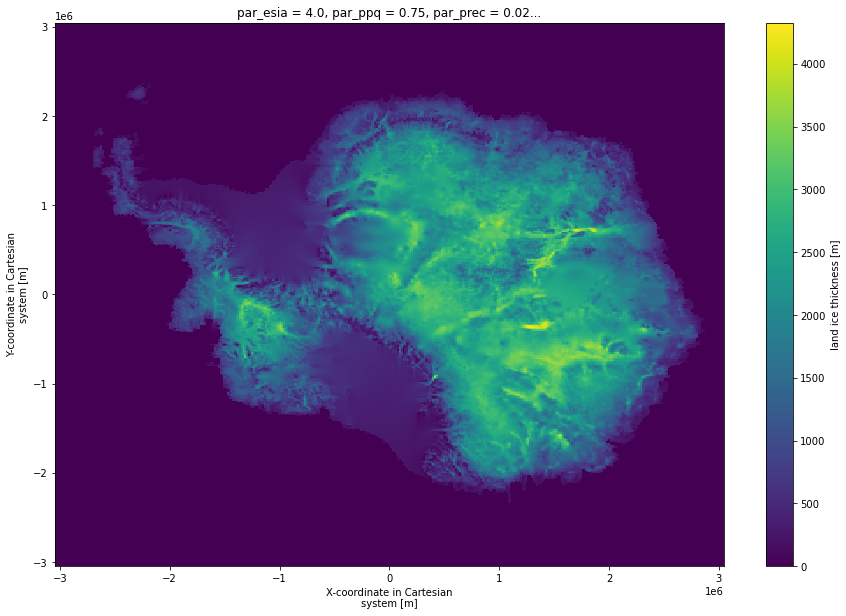

In [14]:
# Land ice thickness plotted for the comnbination with the smallest ice thickness anomaly:
# (par_esia= 4.0, par_ppq = 0.75, par_prec= 0.02, par_visc = 2.5e+21)
present.thk.isel(par_esia=2,par_ppq = 2, par_prec= 0,par_visc = 2).plot(size = 10)

The overall land ice thickness was evidently the largest for the combination max. pos., as visible from the larger range in the colorscale. The Ronne and Ross Ice Shelves both had thick ice, and the ice sheet was in a stable condition because the thickness increased inwards. Compared to this combination, the combination max. neg. had more ice loss at the southern part of the Ronne Ice Shelf and larger ice retreat at the eastern part of the Ross Ice Shelf. Ice loss was the largest for the combination min. anom., and the Ronne and Ross Ice Shelves had the largest floating ice area with very thin ice. There was also a small but noticable ice shelf loss at the Amunsen Sea.

## Variation of Total Ice Shelf Area by Time

In [17]:
cellArea = mask_score_time_series.x.attrs['spacing_meters'] * mask_score_time_series.y.attrs['spacing_meters']
import xarray as xr

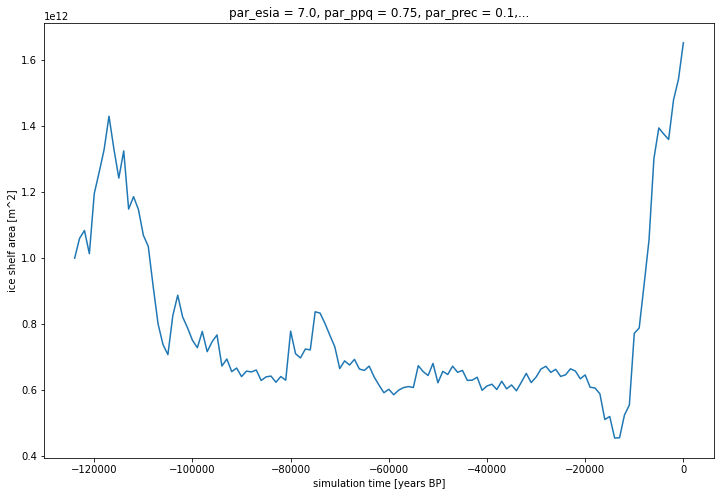

In [18]:
# Variation of total ice shelf area by time for the combination with largest negative ice thickness anomaly:
# (par_esia= 7.0, par_ppq = 0.75, par_prec= 0.1, par_visc = 1e+20).
ice_shelf_area = (xr.where(mask_score_time_series.mask.isel(par_esia=3, par_ppq=2, par_prec=3, par_visc=0) == 3 ,1 ,0 ).sum(['x','y'])*cellArea)
ice_shelf_area.attrs['units'] = 'm^2'
ice_shelf_area.attrs['long_name'] = 'ice shelf area'
ice_shelf_area.time.attrs['long_name'] = 'simulation time'
ice_shelf_area.time.attrs['units'] = 'years BP'
p = ice_shelf_area.plot(size=8)

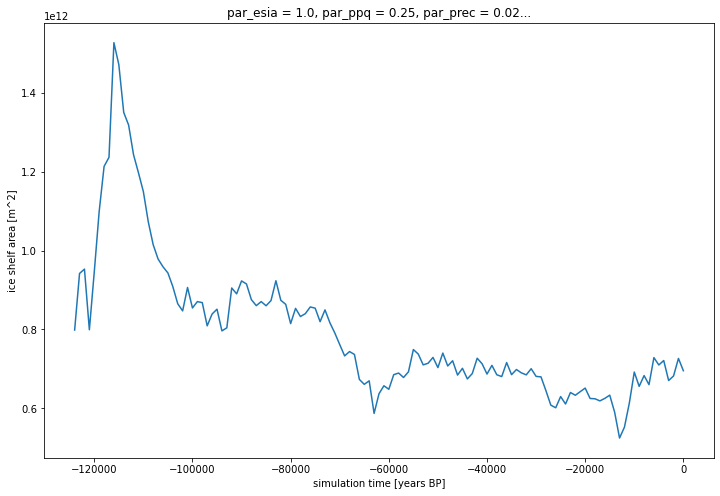

In [13]:
# Variation of total ice shelf area by time for the combination with the largest positive ice thickness anomaly:
# (par_esia= 1.0, par_ppq = 0.25, par_prec= 0.02, par_visc = 1e+20).
ice_shelf_area = (xr.where(mask_score_time_series.mask.isel(par_esia=0, par_ppq=0, par_prec=0, par_visc=0) == 3 ,1 ,0 ).sum(['x','y'])*cellArea)
ice_shelf_area.attrs['units'] = 'm^2'
ice_shelf_area.attrs['long_name'] = 'ice shelf area'
ice_shelf_area.time.attrs['long_name'] = 'simulation time'
ice_shelf_area.time.attrs['units'] = 'years BP'
p = ice_shelf_area.plot(size=8)

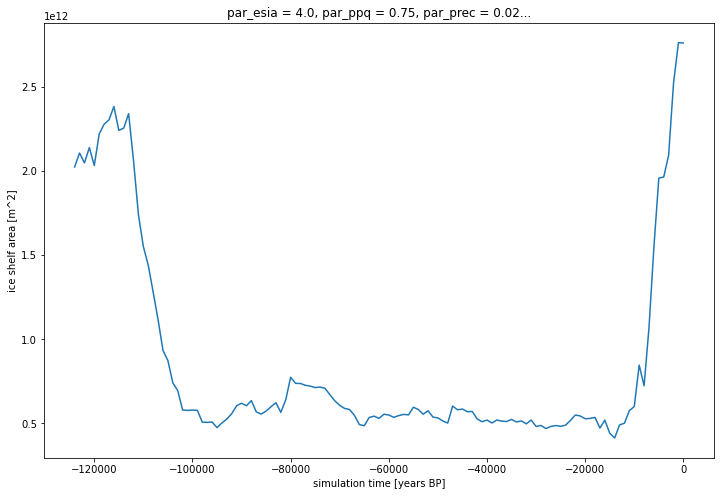

In [19]:
# Variation of total ice shelf area by time for the combination with the largest negative ice thickness anomaly:
# (par_esia= 4.0, par_ppq = 0.75, par_prec= 0.02, par_visc = 2.5e+21).
ice_shelf_area = (xr.where(mask_score_time_series.mask.isel(par_esia=2, par_ppq=2, par_prec=0, par_visc=2) == 3 ,1 ,0 ).sum(['x','y'])*cellArea)
ice_shelf_area.attrs['units'] = 'm^2'
ice_shelf_area.attrs['long_name'] = 'ice shelf area'
ice_shelf_area.time.attrs['long_name'] = 'simulation time'
ice_shelf_area.time.attrs['units'] = 'years BP'
p = ice_shelf_area.plot(size=8)

Considering the previous two results, I predicted that the total ice shelf area will be the largest for the combination min. anom. and smallest for the combination max. pos.

This prediction was correct. It was particularly interesting that the variation in total ice thickness was roughly the same for the combianations with the largest ice thickness anomalies until roughly 13,000 years ago; on the contrary, ice shelf area was even slightly larger for the combination max. pos. than for the combination max. neg. until roughly 65,000 years ago. A large difference occurs in roughly 13,000 years ago, when the combination max. pos. only recovers its ice shelf area but the combination max. neg. begins to rapidly gain ice shelf area. Another interesting point was that ice shelf area for the combination min. anom. was already larger than for the other two combinations 120,000 years ago. Ice shelf area also begins to rapidly rise in roughly 13,000 years ago for this combination, but at a more rapid rate than for the coombination max. neg.